In [15]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

# Data preprocessing

In [16]:
data = pd.read_csv("COMPLETE_DATA.csv",sep=";", decimal='.') #import dataset
data.head() #Visualize first 5 rows of dataset

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.0004,-0.0002,3.0,0,0.0066,1.6712,0.0001,2.0400,0.7129,0.3687
1,ND3X0.2,-0.0004,0.5391,3.0,0,0.0063,1.6898,0.0004,2.0409,0.7129,0.3511
2,ND3X0.4,-0.0004,1.0784,3.0,0,0.0057,1.7185,0.0004,2.0314,0.7090,0.3129
3,ND3X0.6,-0.0004,1.6178,3.0,0,0.0049,1.7692,0.0000,2.0348,0.7142,0.2656
4,ND3X0.8,-0.0004,2.1571,3.0,0,0.0041,1.8047,0.0000,2.0267,0.7106,0.2220


In [17]:
data.shape #visualize dataset dimensions

(10582, 11)

In [18]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values #select only input features
Y = data["1st_exc_en"].values #select outupt variable

In [19]:
#Data splitting into training and testing, with 20% test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

In [20]:
#Data preprocessing with Standard Scaling, removing mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [21]:
type(y_train[0])

numpy.float64

In [22]:
X_train.shape[1]

4

# Neural Netowork

In [38]:
#Building Neural Network architecture
model = Sequential()
model.add(Dense(256, input_shape=(4,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [39]:
#Choose optimization parameters
model.compile(loss='mse', optimizer='adam')

In [40]:
#A brief summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               1280      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44,545
Trainable params: 44,545
Non-trainable params: 0
_________________________________________________________________


In [41]:
#number of epochs used for training
num_epochs = 1000

In [42]:
#callback = EarlyStopping(monitor="val_loss", patience=100, verbose=1)

In [43]:
#Model training
#%%time
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/1000
239/239 [==============================] - 1s 2ms/step - loss: 0.1451 - val_loss: 0.0043
Epoch 2/1000
239/239 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 3/1000
239/239 [==============================] - 0s 2ms/step - loss: 5.3529e-04 - val_loss: 0.0013
Epoch 4/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.1518e-04 - val_loss: 0.0010
Epoch 5/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.8379e-04 - val_loss: 6.5648e-04
Epoch 6/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.7493e-04 - val_loss: 2.6393e-04
Epoch 7/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.6507e-04 - val_loss: 2.6370e-04
Epoch 8/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.6689e-04 - val_loss: 5.0132e-04
Epoch 9/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.2620e-04 - val_loss: 6.0902e-04
Epoch 10/1000
239/239 [===========

239/239 [==============================] - 0s 2ms/step - loss: 6.1347e-05 - val_loss: 5.0199e-05
Epoch 76/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.1461e-05 - val_loss: 4.7246e-05
Epoch 77/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.3178e-05 - val_loss: 5.3731e-05
Epoch 78/1000
239/239 [==============================] - 0s 2ms/step - loss: 5.4928e-05 - val_loss: 2.7689e-05
Epoch 79/1000
239/239 [==============================] - 0s 2ms/step - loss: 5.8597e-05 - val_loss: 5.0460e-05
Epoch 80/1000
239/239 [==============================] - 0s 2ms/step - loss: 6.1443e-05 - val_loss: 1.7091e-04
Epoch 81/1000
239/239 [==============================] - 0s 2ms/step - loss: 7.2349e-05 - val_loss: 3.1644e-04
Epoch 82/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.3887e-05 - val_loss: 7.5552e-04
Epoch 83/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.0695e-05 - val_loss: 3.2528e-05
Epoch 84/1000
2

239/239 [==============================] - 0s 2ms/step - loss: 3.2584e-05 - val_loss: 2.7028e-05
Epoch 149/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.3758e-05 - val_loss: 2.9374e-05
Epoch 150/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.7745e-05 - val_loss: 1.2619e-04
Epoch 151/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.7914e-05 - val_loss: 2.1050e-05
Epoch 152/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.6860e-05 - val_loss: 2.3435e-05
Epoch 153/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.2708e-05 - val_loss: 6.9989e-05
Epoch 154/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.0472e-05 - val_loss: 8.3350e-05
Epoch 155/1000
239/239 [==============================] - 0s 2ms/step - loss: 3.0035e-05 - val_loss: 2.8321e-05
Epoch 156/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.8215e-05 - val_loss: 7.3935e-05
Epoch 1

239/239 [==============================] - 0s 2ms/step - loss: 2.3874e-05 - val_loss: 1.1172e-04
Epoch 222/1000
239/239 [==============================] - 0s 2ms/step - loss: 4.4329e-05 - val_loss: 5.0261e-05
Epoch 223/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.7085e-05 - val_loss: 2.0783e-05
Epoch 224/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.0068e-05 - val_loss: 4.7817e-05
Epoch 225/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.8550e-05 - val_loss: 2.4935e-04
Epoch 226/1000
239/239 [==============================] - 0s 2ms/step - loss: 5.2176e-05 - val_loss: 1.9150e-05
Epoch 227/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.4108e-05 - val_loss: 2.4149e-05
Epoch 228/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1483e-05 - val_loss: 2.9396e-05
Epoch 229/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.6102e-05 - val_loss: 1.2112e-04
Epoch 2

239/239 [==============================] - 0s 2ms/step - loss: 3.2775e-05 - val_loss: 2.3447e-05
Epoch 295/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7876e-05 - val_loss: 2.3727e-05
Epoch 296/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7604e-05 - val_loss: 1.2892e-05
Epoch 297/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5762e-05 - val_loss: 8.2515e-05
Epoch 298/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1879e-05 - val_loss: 1.7188e-05
Epoch 299/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1306e-05 - val_loss: 1.4215e-05
Epoch 300/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7701e-05 - val_loss: 1.1848e-05
Epoch 301/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8199e-05 - val_loss: 3.0762e-05
Epoch 302/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1676e-05 - val_loss: 1.4341e-05
Epoch 3

239/239 [==============================] - 0s 2ms/step - loss: 1.5819e-05 - val_loss: 1.4859e-05
Epoch 368/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.7449e-05 - val_loss: 3.4376e-05
Epoch 369/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.9558e-05 - val_loss: 2.8182e-05
Epoch 370/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8233e-05 - val_loss: 1.7268e-05
Epoch 371/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.6394e-05 - val_loss: 1.4592e-05
Epoch 372/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8727e-05 - val_loss: 1.4282e-05
Epoch 373/1000
239/239 [==============================] - 0s 1ms/step - loss: 1.7154e-05 - val_loss: 1.7068e-05
Epoch 374/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5982e-05 - val_loss: 5.1545e-05
Epoch 375/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.1138e-05 - val_loss: 1.6169e-05
Epoch 3

239/239 [==============================] - 0s 2ms/step - loss: 1.3132e-05 - val_loss: 1.8132e-05
Epoch 441/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.4685e-05 - val_loss: 1.4700e-05
Epoch 442/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5176e-05 - val_loss: 2.1557e-05
Epoch 443/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.4295e-05 - val_loss: 2.2309e-05
Epoch 444/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.4868e-05 - val_loss: 3.9805e-05
Epoch 445/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8737e-05 - val_loss: 4.9400e-05
Epoch 446/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.4171e-05 - val_loss: 1.6171e-05
Epoch 447/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.3940e-05 - val_loss: 1.1210e-05
Epoch 448/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2238e-05 - val_loss: 1.4449e-05
Epoch 4

239/239 [==============================] - 0s 2ms/step - loss: 1.3999e-05 - val_loss: 1.6526e-05
Epoch 514/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.3956e-05 - val_loss: 1.1561e-05
Epoch 515/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.8802e-05 - val_loss: 2.1886e-05
Epoch 516/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.4674e-05 - val_loss: 1.1338e-05
Epoch 517/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.3138e-05 - val_loss: 1.7072e-05
Epoch 518/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2956e-05 - val_loss: 1.5394e-05
Epoch 519/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.3953e-05 - val_loss: 1.5009e-05
Epoch 520/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1200e-05 - val_loss: 1.6933e-05
Epoch 521/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.5370e-05 - val_loss: 1.9067e-05
Epoch 5

239/239 [==============================] - 0s 2ms/step - loss: 1.1956e-05 - val_loss: 1.2603e-05
Epoch 587/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1386e-05 - val_loss: 1.7909e-05
Epoch 588/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1881e-05 - val_loss: 2.3233e-05
Epoch 589/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.4335e-05 - val_loss: 1.8061e-05
Epoch 590/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2653e-05 - val_loss: 1.4791e-05
Epoch 591/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2659e-05 - val_loss: 1.4602e-05
Epoch 592/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0463e-05 - val_loss: 1.3502e-05
Epoch 593/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2189e-05 - val_loss: 1.5194e-05
Epoch 594/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0207e-05 - val_loss: 1.0796e-05
Epoch 5

239/239 [==============================] - 0s 2ms/step - loss: 1.1330e-05 - val_loss: 1.2317e-05
Epoch 660/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1704e-05 - val_loss: 1.3639e-05
Epoch 661/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.3798e-05 - val_loss: 1.3600e-05
Epoch 662/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1653e-05 - val_loss: 2.1721e-05
Epoch 663/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1734e-05 - val_loss: 1.3420e-05
Epoch 664/1000
239/239 [==============================] - 1s 2ms/step - loss: 1.1509e-05 - val_loss: 1.5859e-05
Epoch 665/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1156e-05 - val_loss: 1.6412e-05
Epoch 666/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.3775e-05 - val_loss: 1.2661e-05
Epoch 667/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0311e-05 - val_loss: 5.8478e-05
Epoch 6

239/239 [==============================] - 0s 2ms/step - loss: 1.1093e-05 - val_loss: 1.2324e-05
Epoch 733/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1131e-05 - val_loss: 5.6639e-05
Epoch 734/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.7097e-05 - val_loss: 1.7542e-05
Epoch 735/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2075e-05 - val_loss: 4.9699e-05
Epoch 736/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2841e-05 - val_loss: 3.2494e-05
Epoch 737/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2147e-05 - val_loss: 1.1089e-05
Epoch 738/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0480e-05 - val_loss: 1.8422e-05
Epoch 739/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.7198e-06 - val_loss: 1.2708e-05
Epoch 740/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.0241e-06 - val_loss: 1.3311e-05
Epoch 7

239/239 [==============================] - 0s 2ms/step - loss: 9.9731e-06 - val_loss: 1.0725e-05
Epoch 806/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.4063e-06 - val_loss: 1.2009e-05
Epoch 807/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.5146e-06 - val_loss: 1.1423e-05
Epoch 808/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.1819e-06 - val_loss: 2.0788e-05
Epoch 809/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.5578e-06 - val_loss: 1.2268e-05
Epoch 810/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1471e-05 - val_loss: 1.3049e-05
Epoch 811/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0238e-05 - val_loss: 1.3563e-05
Epoch 812/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0346e-05 - val_loss: 1.5733e-05
Epoch 813/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.2483e-05 - val_loss: 1.3014e-05
Epoch 8

239/239 [==============================] - 0s 2ms/step - loss: 8.6584e-06 - val_loss: 8.9922e-06
Epoch 879/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0613e-05 - val_loss: 1.7629e-05
Epoch 880/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.2689e-06 - val_loss: 1.1039e-05
Epoch 881/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0500e-05 - val_loss: 1.5030e-05
Epoch 882/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0582e-05 - val_loss: 1.1788e-05
Epoch 883/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0936e-05 - val_loss: 1.8864e-05
Epoch 884/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0903e-05 - val_loss: 1.1503e-05
Epoch 885/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.7001e-06 - val_loss: 9.4067e-06
Epoch 886/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.7230e-06 - val_loss: 1.0118e-05
Epoch 8

239/239 [==============================] - 0s 2ms/step - loss: 8.4912e-06 - val_loss: 3.1842e-04
Epoch 952/1000
239/239 [==============================] - 0s 2ms/step - loss: 2.9915e-05 - val_loss: 1.1556e-05
Epoch 953/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.1506e-05 - val_loss: 1.0437e-05
Epoch 954/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.3853e-06 - val_loss: 1.1126e-05
Epoch 955/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.4777e-06 - val_loss: 1.4614e-05
Epoch 956/1000
239/239 [==============================] - 0s 2ms/step - loss: 1.0047e-05 - val_loss: 9.4185e-06
Epoch 957/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.3854e-06 - val_loss: 1.0595e-05
Epoch 958/1000
239/239 [==============================] - 0s 2ms/step - loss: 9.6088e-06 - val_loss: 1.1816e-05
Epoch 959/1000
239/239 [==============================] - 0s 2ms/step - loss: 8.5466e-06 - val_loss: 1.2006e-05
Epoch 9

# Model Evaluation

In [45]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 1ms/step - loss: 1.9696e-05


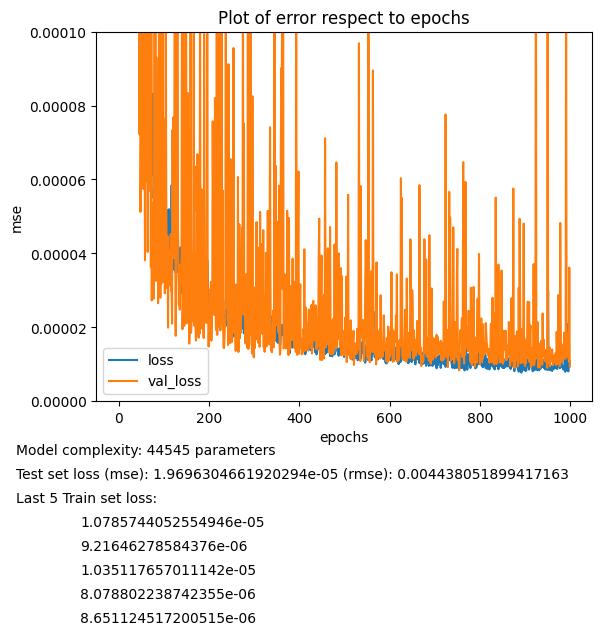

In [61]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-4])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [32]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [33]:
model.predict(emp_test)

array([[6.7013755]], dtype=float32)

# Scatter plot

In [51]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [52]:
pred = predictions(X_test)

In [53]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

1.9696305877529417e-05

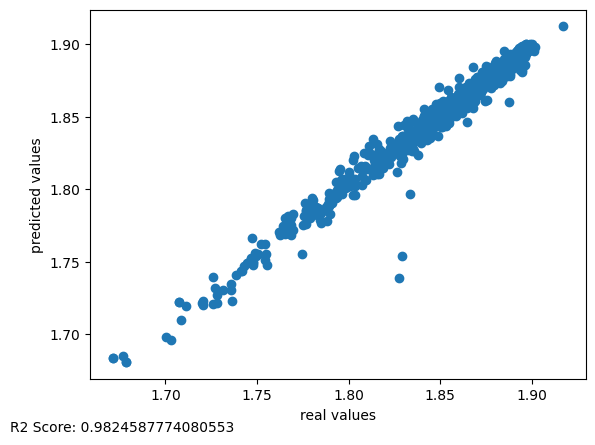

In [54]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [55]:
model.save('1st_exc_en.h5')